In [1]:
import pandas as pd #Importing pandas for data-frame execution
filename = 'Medusa_Nebula' #Add your file name
df = pd.read_csv(filename + '.csv')
n_slices = len(df) #No, of slices of the image (automates regradless the number of slices)
print (n_slices, 'slices')
df.head() #Ensuring data is in place
#Sequence can be thought as a progression of time

80 slices


,sequence,red,green,blue,stars
0,1,76,52,53,19
1,2,80,53,53,14
2,3,80,52,52,14
3,4,82,53,53,17
4,5,89,56,56,15


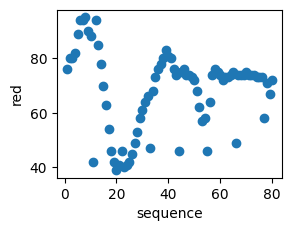

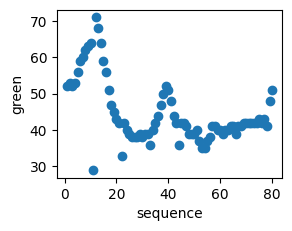

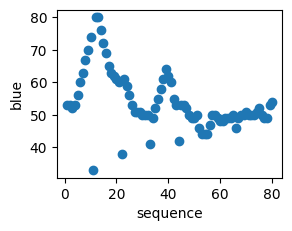

In [2]:
#plotting the data gives a visual feedback about the end result, not necessary but recommended
#Substitute red, blue, green, stars for your own fields, the code is just so flexible!
import matplotlib.pylab as plt 
sequence = df['sequence'].values
red = df['red'].values
green = df['green'].values
blue = df ['blue'].values

plt.subplot(2, 2, 1)
plt.scatter(sequence, red)
plt.xlabel('sequence')
plt.ylabel('red')
plt.show()

plt.subplot(2, 2, 2)
plt.scatter(sequence, green)
plt.xlabel('sequence')
plt.ylabel('green')
plt.show()

plt.subplot(2, 2, 3)
plt.scatter(sequence, blue)
plt.xlabel('sequence')
plt.ylabel('blue')
plt.show()


In [3]:
#A mapping function, performs linear mapping or interpolation. Use to map a variable to the sound parameter
def map_value(value, min_value, max_value, min_result, max_result):
 result = min_result + (value - min_value)/(max_value - min_value)*(max_result - min_result)
 return result

In [4]:
sequence_per_beat = 1 #Highly depends on the desired output, this example goes for 1 to depict 1 beat eper second
s_data = sequence/sequence_per_beat
duration_beats = max(s_data)
duration_beats

80.0

Duration: 80.0 seconds


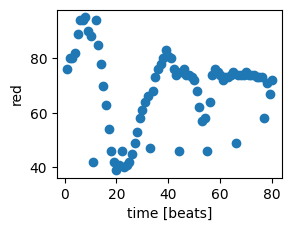

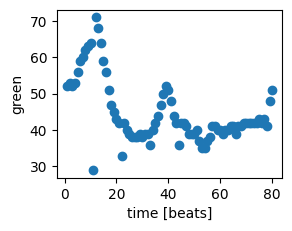

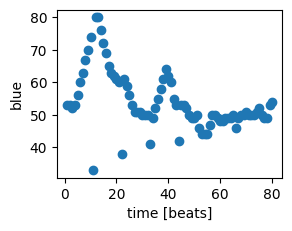

In [5]:
bpm = 60  
duration_sec = duration_beats*60/bpm #Scales the duration to seconds for ease
print('Duration:', duration_sec, 'seconds')

#These graphs represent the time against varible.
plt.subplot(2, 2, 1)
plt.scatter(s_data, red)
plt.xlabel('time [beats]')
plt.ylabel('red')
plt.show()

plt.subplot(2, 2, 1)
plt.scatter(s_data, green)
plt.xlabel('time [beats]')
plt.ylabel('green')
plt.show()

plt.subplot(2, 2, 1)
plt.scatter(s_data, blue)
plt.xlabel('time [beats]')
plt.ylabel('blue')
plt.show()

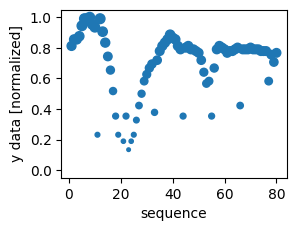

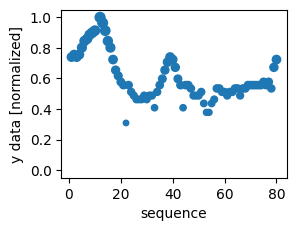

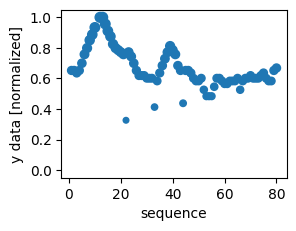

In [6]:
#Scaling values to control the data in the MIDI production
ry_data = map_value(red, min(red), max(red), 0, 1)

ry_scale = 0.5 

ry_data = ry_data**ry_scale

plt.subplot(2 ,2, 2)
plt.scatter(sequence, ry_data, s=50*ry_data)
plt.xlabel('sequence')
plt.ylabel('y data [normalized]')
plt.show()

gy_data = map_value(green, min(green), max(green), 0, 1)

gy_scale = 0.5 

gy_data = gy_data**gy_scale

plt.subplot(2 ,2, 3)
plt.scatter(sequence, gy_data, s=50*gy_data)
plt.xlabel('sequence')
plt.ylabel('y data [normalized]')
plt.show()

by_data = map_value(blue, min(blue), max(blue), 0, 1)

by_scale = 0.5 

by_data = by_data**by_scale

plt.subplot(2 ,2, 4)
plt.scatter(sequence, by_data, s=50*by_data)
plt.xlabel('sequence')
plt.ylabel('y data [normalized]')
plt.show()

In [7]:
#Converting MIDI notes, use any preferred scale 
from audiolazy import str2midi
#4 octaves of major pentatonic scale 
note_names = ['C2','D2','E2','G2','A2',
             'C3','D3','E3','G3','A3',
             'C4','D4','E4','G4','A4',
             'C5','D5','E5','G5','A5']

note_midis = [str2midi(n) for n in note_names] #listing MIDI note numbers 

n_notes = len(note_midis)
print('Resolution:',n_notes, 'notes')

Resolution: 20 notes


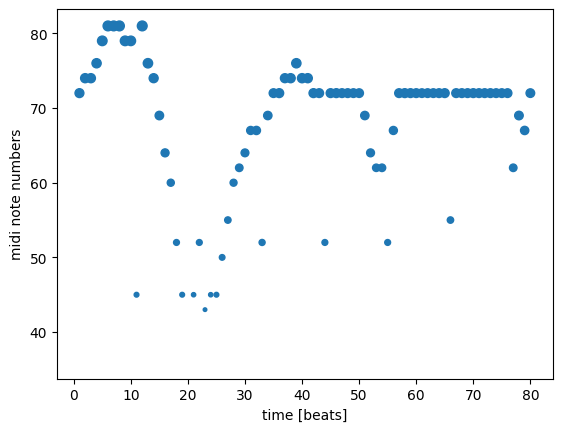

In [8]:
pitch1_data = [] #red is pitch1 data
for i in range(n_slices):
    note_pitch1 = round(map_value(ry_data[i], 0, 1, 0, n_notes-1))  
    pitch1_data.append(note_midis[note_pitch1])
plt.scatter(s_data, pitch1_data, s=50*ry_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()

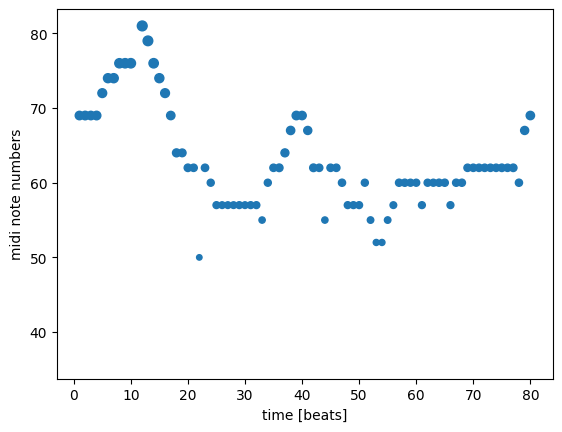

In [9]:
pitch2_data = [] #green is pitch2 data
for i in range(n_slices):
    note_pitch2 = round(map_value(gy_data[i], 0, 1, 0, n_notes-1))  
    pitch2_data.append(note_midis[note_pitch2])
plt.scatter(s_data, pitch2_data, s=50*gy_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()

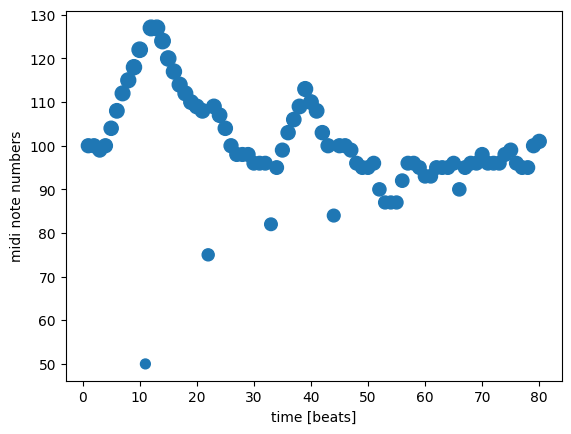

In [10]:
vel_min,vel_max = 50,127   #blue is velocity data

vel_data = []
for i in range(n_slices):
    note_velocity = round(map_value(by_data[i], 0, 1, vel_min, vel_max))
    vel_data.append(note_velocity)
    
plt.scatter(s_data, vel_data, s=vel_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()

In [11]:
import numpy as np
import array
from midiutil import MIDIFile 

pitch1_array = np.array(pitch1_data)
pitch2_array = np.array(pitch2_data)
pitch_array = np.round((pitch1_array + pitch2_array) / 2)

my_midi_file = MIDIFile(1)  
my_midi_file.addTempo(track=0, time=0, tempo=bpm) 

#Change value as preferred. Defaults: track and channel = 0, time = [HAS to be mapped], duration = 2, volume = [0-127]
for i in range(n_slices):
    my_midi_file.addNote(track=0, channel=0, pitch=int(pitch1_array[i]), time=s_data[i], duration=2, volume=vel_data[i])
    
with open(filename + '.mid', "wb") as f:
    my_midi_file.writeFile(f) 